# Praktikum 3
#### Muhamad Rizal Arfiyan - 22.11.5227 - IF11
#### [https://github.com/rizalarfiyan/big-data](https://github.com/rizalarfiyan/big-data)

## 1. Import library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 2. Baca file CSV menggunakan library pandas

In [2]:
path = "./smartphones_cleaned_v6.csv"
data = pd.read_csv(path)
data.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


## 3. Normalisasi data
- Normalisasi data dengan mengubah nilai kosong (null) dengan dengan 0
- Mengubah nilai boolean True dan False menjadi 1 dan 0
- Mengurutkan data jenis menjadi angka, semisal android = 0, ios = 1, other = 2, dst. Pada cara ini bisa menggunakan library pandas fungsi factorize ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html)).

## 4. Cari nilai korelasi tertinggi
- Bisa menggunakan library pandas fungsi corr untuk korelasi di setiap kolom ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)). Attribute numeric_only=True adalah untuk memfilter hanya kolom yang bertipe data numeric (int, float, unsigned int, dll).

In [4]:
correlation_matrix = data.corr(numeric_only=True)
price_correlation = correlation_matrix["price"].sort_values(ascending=False)
print(price_correlation)

price                        1.000000
internal_memory              0.557168
has_nfc                      0.470951
ram_capacity                 0.386002
resolution_height            0.353578
os                           0.348308
resolution_width             0.340592
has_5g                       0.305066
refresh_rate                 0.244115
processor_speed              0.175386
primary_camera_front         0.146122
fast_charging                0.139824
num_rear_cameras             0.125330
fast_charging_available      0.116739
screen_size                  0.113253
primary_camera_rear          0.092095
brand_name                   0.089374
num_front_cameras            0.055305
has_ir_blaster              -0.015807
num_cores                   -0.104890
rating                      -0.129441
processor_brand             -0.141318
battery_capacity            -0.189916
extended_upto               -0.272838
extended_memory_available   -0.448628
Name: price, dtype: float64


## 5. Cek korelasi menggunakan rumus korelasi pearson

In [5]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(data["internal_memory"], data["price"])
print(
    "The Pearson Correlation Coefficient is",
    pearson_coef,
    " with a P-value of P =",
    p_value,
)

The Pearson Correlation Coefficient is 0.5571676328262642  with a P-value of P = 5.281230323250923e-81


## 6. Cek nama kolom dan value korelasi tertinggi

In [6]:
highest_variable = price_correlation.index[1]
highest_value = price_correlation[1]
print(highest_variable, " - ", highest_value)

internal_memory  -  0.5571676328262649


## 7. Tampilkan dengan diagram scatter plot

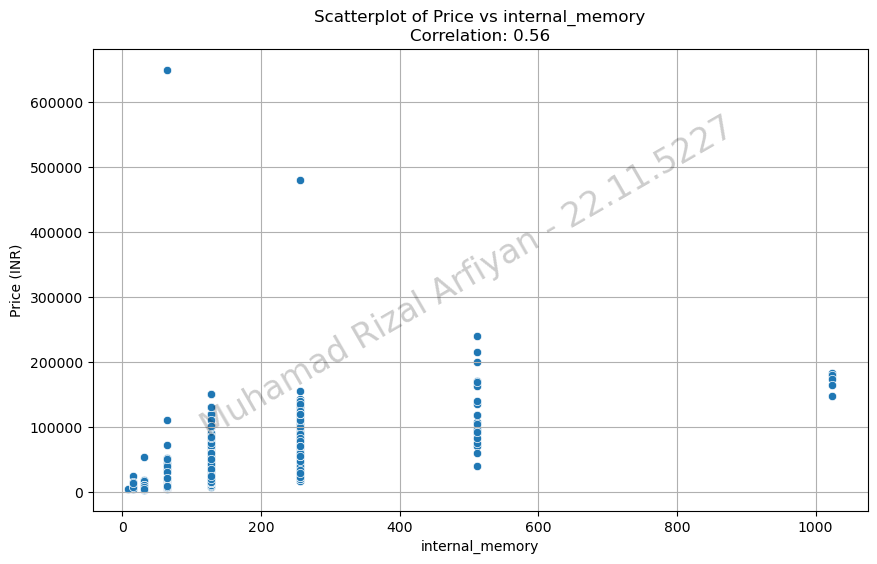

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=highest_variable, y="price", data=data)
plt.title(
    f"Scatterplot of Price vs {highest_variable}\nCorrelation: {highest_value:.2f}"
)
plt.xlabel(highest_variable)
plt.ylabel("Price (INR)")
plt.grid(True)
plt.text(
    0.5,
    0.5,
    "Muhamad Rizal Arfiyan - 22.11.5227",
    fontsize=24,
    color="black",
    ha="center",
    va="center",
    alpha=0.2,
    transform=plt.gcf().transFigure,
    rotation=30,
)
plt.show()